In [1]:
%config IPCompleter.evaluation='unsafe'

In [2]:
from pyiron_atomistics import Project
from atomrdf import KnowledgeGraph
import numpy as np

In [3]:
project = 'wfa23'
pr = Project(project)
kg = KnowledgeGraph(store='db', store_file=f'{project}.db')
kg.enable_workflow(pr, workflow_environment='pyiron')

In [4]:
structure = pr.create.structure.annotated_structure.bulk('Cu', cubic=True, label='cu md', repetitions=(3, 3, 3))
job = pr.create.job.Lammps('bulk', delete_existing_job=True, delete_aborted_job=True)
job.structure = structure
job.potential = '2001--Mishin-Y--Cu-1--LAMMPS--ipr1'
job.calc_md(pressure=0, temperature=500)
job.run()
kg.add_workflow(job, workflow_environment='pyiron')

The job bulk was saved and received the ID: 381


In [5]:
kg.samples

[cu_md, sample:e46e449d-fd6a-4ecf-b91b-f32cfece2a82_from_cu_md]

In [6]:
sample = kg.samples[1]

In [8]:
min_struct = sample.structure

In [10]:
del min_struct[3]

In [11]:
job = pr.create.job.Lammps('vacancy', delete_existing_job=True, delete_aborted_job=True)
job.structure = min_struct.write.pyiron()
job.potential = '2001--Mishin-Y--Cu-1--LAMMPS--ipr1'
job.calc_static()
job.run()
kg.add_workflow(job, workflow_environment='pyiron')

The job vacancy was saved and received the ID: 382


form_energy = energy_vac - ((number_atoms-1)/number_atoms)*energy_bulk

In [12]:
kg.samples

[cu_md,
 sample:e46e449d-fd6a-4ecf-b91b-f32cfece2a82_from_cu_md,
 sample:9c646b19-c69a-448f-8091-870405b4b335_from_sample:e46e449d-fd6a-4ecf-b91b-f32cfece2a82_from_cu_md]

In [13]:
vac_sample = kg.samples[2]
bulk_sample = kg.samples[1]

In [14]:
e_form = vac_sample.outputs.TotalEnergy - ((bulk_sample.properties.no_of_atoms - 1)/bulk_sample.properties.no_of_atoms)*bulk_sample.outputs.TotalEnergy

In [18]:
e_form.value

-5.688631775700969

In [16]:
e_form.label = 'VacancyFormationEnergy'

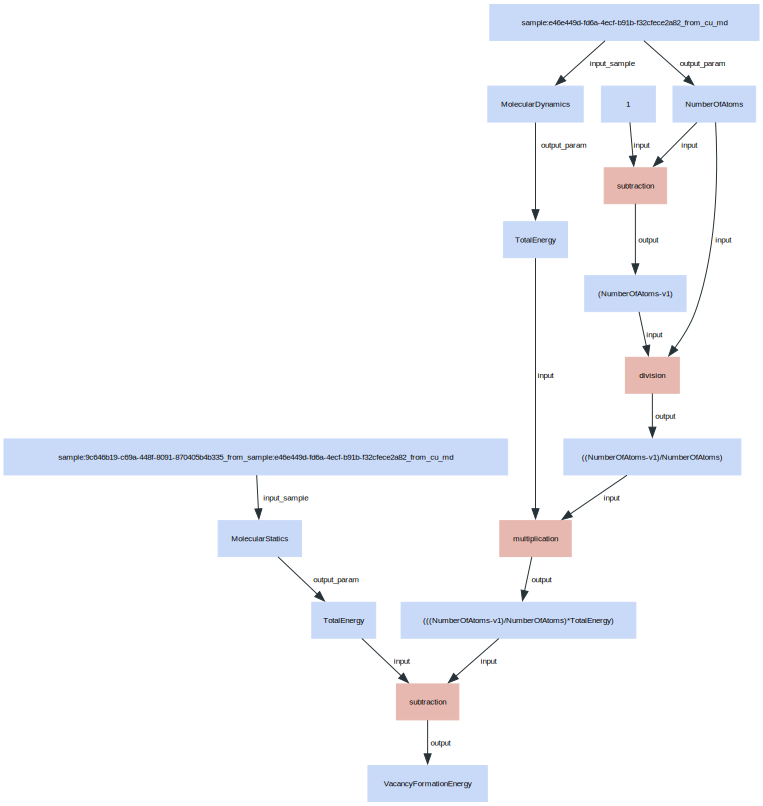

In [17]:
kg.generate_provenance(label='VacancyFormationEnergy', visualize=True)